# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page.

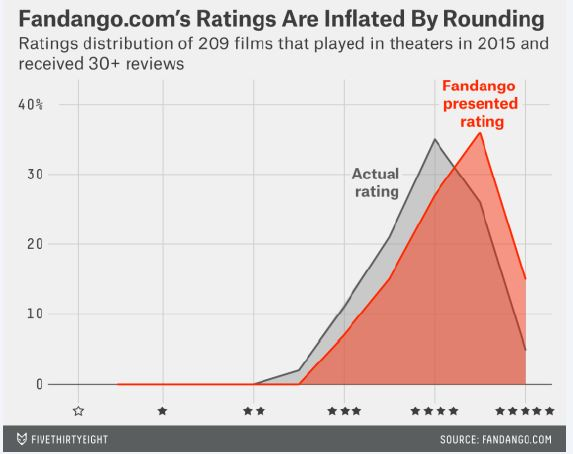

In [1]:
from IPython.display import Image
Image(filename='Fandango.JPG')

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### Exploring the Data

In [2]:
import pandas as pd

In [3]:
old_data = pd.read_csv('fandango_score_comparison.csv')
new_data = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
old_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
new_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
print(old_data.shape)
print(new_data.shape)

(146, 22)
(214, 15)


### Isolating relevant columns

In [8]:
fandango_old = old_data[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]].copy()
fandango_new = new_data[["movie","year","fandango"]].copy()

In [9]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
fandango_old.shape

(146, 5)

In [11]:
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [12]:
fandango_old.shape

(146, 5)

### Changing the goal of the analysis

Our initial goal was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.
By looking at the repositories of the [first](https://github.com/fivethirtyeight/data/tree/master/fandango) and the [second](https://github.com/mircealex/Movie_ratings_2016_17) datasets, we notice that the the samplings have not been random, and the samples may not be representive of the population we're interested in describing
Therefore, rather than collecting new data, we slightly change our initial goal, and try to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and 2016. 
With the new goal, we now have two populations that we want to describe and compare with each other: 
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

### Checking if both samples contain popular movies

We define **a popular movie** as a movie with more than 30 reviews.

In [24]:
fandango_old[fandango_old["Fandango_votes"] < 30].shape

(0, 5)

All the movies in fandango_old have at least 30 reviews. We now check the fan ratings of a sample of 10 randomly chosen movies in fandango_new.

In [25]:
fandango_new.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [26]:
# The following data is collected from Fandango's website:

fan_ratings = {
    "Mechanic Resurrection": 2247,
    "Warcraft" : 7271,
    "Max Steel" : 493,
    "Me Before You" : 5263,
    "Fantastic Beasts and Where to Find Them" : 13400,
    "Cell" : 17,
    "Genius" : 127,
    "Sully" : 11877,
    "A Hologram for the King" : 500,
    "Captain America: Civil War" : 35057,
}

In [27]:
popular_movie_count = 0

for movie in fan_ratings.keys():
    if fan_ratings[movie] > 30:
        popular_movie_count += 1

print(popular_movie_count/len(fan_ratings.keys()))

0.9


90% of the movies in our sample from fandango_new were popular. This is good enough!

### Isolating the movies released in 2015 and 2016

In [30]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [32]:
fandango_old["Year"] = fandango_old["FILM"].str[-5:-1]

In [35]:
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [33]:
fandango_old["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [34]:
fandango_new["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [36]:
fandango_2015 = fandango_old[fandango_old['Year'] == '2015'].copy()

In [37]:
fandango_2016 = fandango_new[fandango_new['year'] == 2016].copy()

In [38]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [39]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


### Comparing 2015 and 2016 ratings

In [40]:
import matplotlib.pyplot as plt
from numpy import arange

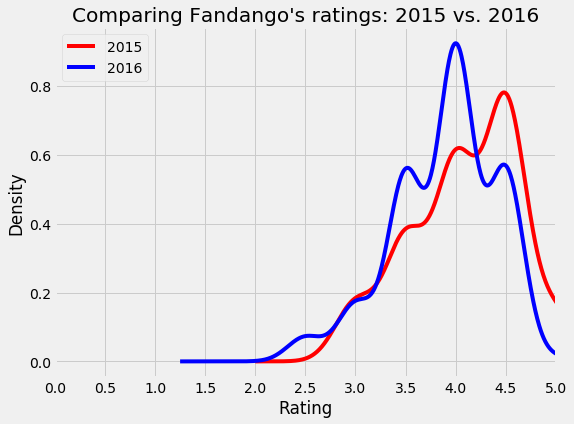

In [86]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,6), c = 'red')
fandango_2016['fandango'].plot.kde(label = '2016', legend = True, c = 'blue')

plt.style.use('fivethirtyeight')
plt.title("Comparing Fandango's ratings: 2015 vs. 2016")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.legend(loc="upper left")
plt.xlim(0,5)
plt.show()

As we can see in the figure, both 2015 and 2016 distributions are strongly left skewed.

### Comparing relative frequencies

In [55]:
(fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100).round(2)

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [56]:
(fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100).round(2)

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

### Finding mean, median and mode

In [66]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()
print("2015 Mean: ", mean_2015)
print("2016 Mean: ", mean_2016)

2015 Mean:  4.0852713178294575
2016 Mean:  3.887434554973822


In [67]:
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

print("2015 Median: ", median_2015)
print("2016 Median: ", median_2016)

2015 Median:  4.0
2016 Median:  4.0


In [68]:
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

print("2015 Mode: ", mode_2015)
print("2016 Mode]: ", mode_2016)

2015 Mode:  4.5
2016 Mode]:  4.0


### Comparing summary statistics

In [69]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


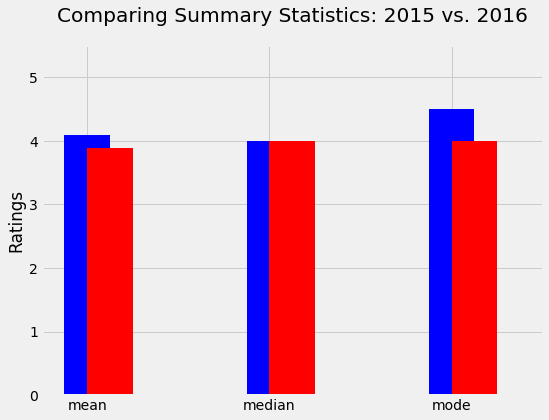

In [84]:
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,6))
plt.style.use('fivethirtyeight')
plt.title('Comparing Summary Statistics: 2015 vs. 2016', y=1.05)
plt.ylim(0,5.5)
plt.ylabel('Ratings')
plt.legendloc = ('upper center')
plt.show()

As we can see in the fgure above, on average, the popular movies in 2016 were rated lower on Fandango than the ones in 2015. This may (or may not) be due to the concernes raised in Hickey's article!